In [1]:
import sys
#sys.path.insert(1, '/home/msantola/MyPythonLibrary/AnalysisObservations/libobs/')
sys.path.insert(1, '/home/msantola/MyPythonLibrary/ClimAnag/libhma/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob

In [2]:
#source='/home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/
#resultsDir=source + 'Results/'
#plotsDir=source + 'Plots/'

In [3]:
sourceData='/data/msantola/obs/'

In [4]:
iyr=1963
fyr=2012

In [5]:
variable='z500'
units='m'
domain='NH'
season='DJF'

In [6]:
model1='eraint'
filename1 = 'Z500_mon.eraint_197901_201908.nc'
ds1 = xr.open_dataset(sourceData+model1+'/'+filename1)['z']
print(ds1)
ds1=dom.shifting_grid(ds1)
ds1=ds1[:,0,:,:]/9.8
field1=dom.field_dom(ds1,domain)

<xarray.DataArray 'z' (time: 488, level: 1, latitude: 73, longitude: 144)>
[5129856 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level      (level) float64 500.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-08-01
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m**2 s**-2


In [7]:
#latlim=slice(60,10)
#lonlim=slice(40,130)
1

1

In [8]:
#model2=str('era5')
#filename2 = 'Z500_mon.era5_195001_202105_interp.nc'
#ds2 = xr.open_dataset(sourceData+model2+'/'+filename2)['z']
#ds2=ds2[:,0,:,:]/9.8
#field2=dom.field_dom(ds2,domain)

In [9]:
model3=str('jra55')
filename3 = 'Z500_mon.jra55_195801_202105.nc'
ds3 = xr.open_dataset(sourceData+model3+'/'+filename3)['gh']
ds3=ds3[:,0,:,:]
ds3=dom.shifting_grid(ds3)
print(ds3)
field3=dom.field_dom(ds3,domain)

<xarray.DataArray 'gh' (time: 761, lat: 73, lon: 144)>
[7999632 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
    lev      float64 5e+04
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-05-01
  * lon      (lon) float64 -177.5 -175.0 -172.5 -170.0 ... 175.0 177.5 180.0
Attributes:
    long_name:  Geopotential Height
    units:      gpm
    code:       7
    table:      200


In [10]:
#model4=str('ncep-ncar')
#filename4 = 'Z500_mon.ncep-ncar_194801_202105.nc'
#ds4 = xr.open_dataset(sourceData+filename4)['hgt']
#ds4=ds4[:,0,:,:]
#field4=dom.field_dom(ds4,domain)

In [11]:
model5=str('noaaV2c')
filename5 = 'hgt.mon.mean.noaaV2c_185101-201412.nc'
ds5 = xr.open_dataset(sourceData+model5+'/'+filename5)['hgt']
level=500
ds5=ds5.sel(level=500)#ds4[:,0,:,:]
ds5=dom.shifting_grid(ds5)
field5=dom.field_dom(ds5,domain)

In [20]:

valsList=[]
anomsList=[]


dsList=[field1,field3,field5]
modelList=[model1,model3,model5]

for elem in dsList:
    
    v,a=climb.seasonal_selection(elem,season,iyr,fyr)
    valsList.append(v)
    anomsList.append(a)


(D- 1982  JF- 1983  to D- 2014 JF- 2015
(D- 1982  JF- 1983  to D- 2014 JF- 2015
(D- 1982  JF- 1983  to D- 2014 JF- 2015


In [21]:
parList=[]
trendList=[]
interceptList=[]
rvalueList=[]
pvalueList=[]
stderrList=[]
nyrList=[]
#---------------------------------------------------------
for elem in anomsList:
    #par=climb.spatial_regression(elem,index)
    par=climb.trend_vect(elem.time,elem,'time')
    parList.append(par)
    nyrList.append(len(elem.time))
    trendList.append(par[0])
    interceptList.append(par[1])
    rvalueList.append(par[2])
    pvalueList.append(par[3])
    stderrList.append(par[4])
df=fyr-iyr

trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


In [22]:
#LabelListX=[model1,model2,model3,model4]
#LabelListY=[str(iyr1)+'-'+str(fyr1),'','',str(iyr2)+'-'+str(fyr2),'','',str(iyr3)+'-'+str(fyr3),'','']

In [23]:
climList=[]
stdList=[]
for elem in valsList:
    c=elem.mean('time')
    s=elem.std('time')
    climList.append(c)
    stdList.append(s)

/home/msantola/mambaforge/envs/cartoenv/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/msantola/mambaforge/envs/cartoenv/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/msantola/mambaforge/envs/cartoenv/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


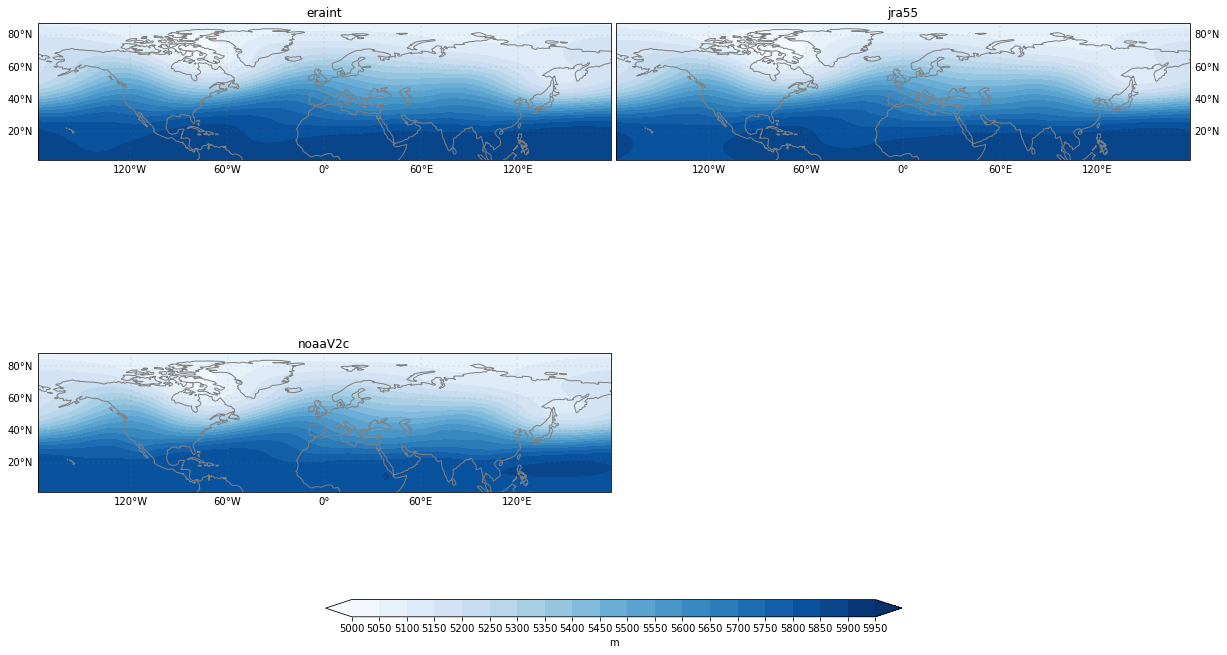

In [24]:
plotList=climList
clevs=np.arange(5000,6000,50);levs_ticks=clevs 
cmap='Blues'
nrows=2
ncols=2 

fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,20))
axs=axs.flatten()
for i in np.arange(0,len(plotList),1):
    lons, lats = np.meshgrid(plotList[i].coords[plotList[i].dims[1]],plotList[i].coords[plotList[i].dims[0]])
    CS1=axs[i].contourf(lons,lats,plotList[i][:,:],clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
    axs[i].coastlines(color='grey')
    axs[i].set_title(modelList[i])#,x=0.025,y=0.93,backgroundcolor= 'white')
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')
    gl.xlabels_top = False
    if (i% 2) == 0:
        gl.ylabels_right = False
    else:
        gl.ylabels_right = True
        gl.ylabels_left = False

    fig.subplots_adjust(bottom=0.38, top=0.84, left=0.10, right=0.90,wspace=0.010, hspace=0.001)
axs[3].remove()   

cbar_ax = fig.add_axes([0.3, 0.36, 0.4, 0.012])

cbar=fig.colorbar(CS1, cax=cbar_ax,ticks=levs_ticks,orientation='horizontal',label=units)

#plotname='FIG3_GRL_COAFuture'
#plt.savefig(plotsDir+plotname+'.png',format='png',bbox_inches='tight')
plt.show()

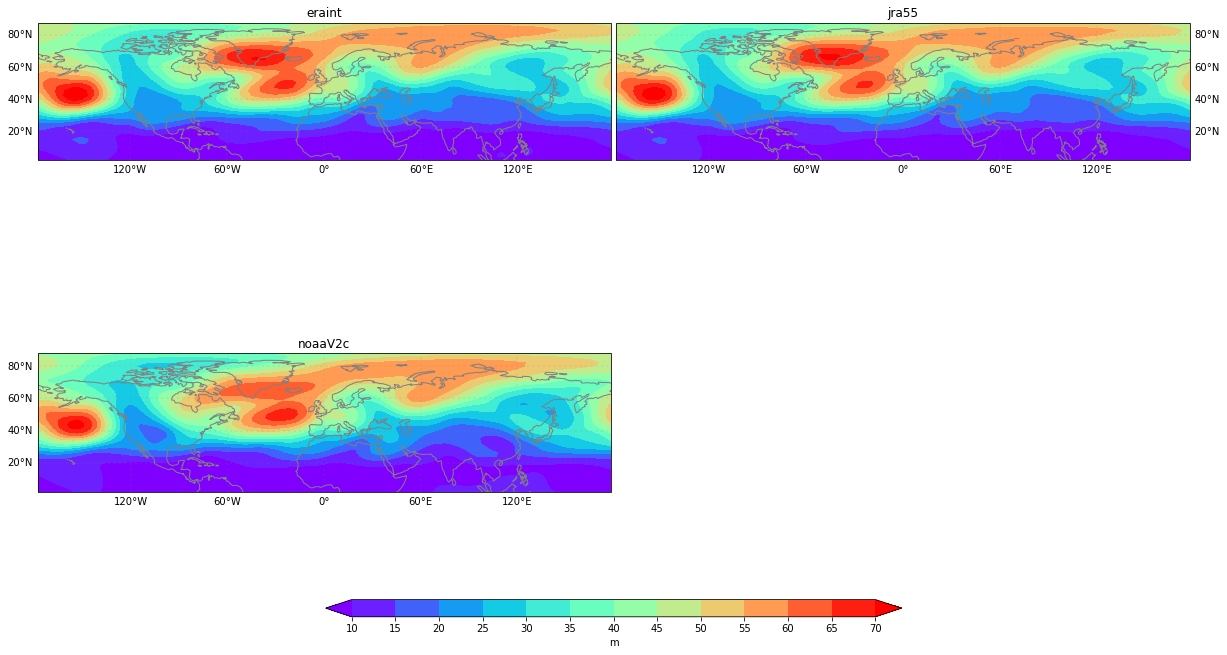

In [25]:

plotList=stdList
clevs=np.arange(10,75,5);levs_ticks=clevs 
cmap='rainbow'
nrows=2
ncols=2 

fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,20))
axs=axs.flatten()
for i in np.arange(0,len(plotList),1):
    lons, lats = np.meshgrid(plotList[i].coords[plotList[i].dims[1]],plotList[i].coords[plotList[i].dims[0]])
    CS1=axs[i].contourf(lons,lats,plotList[i][:,:],clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
    axs[i].coastlines(color='grey')
    axs[i].set_title(modelList[i])#,x=0.025,y=0.93,backgroundcolor= 'white')
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')
    gl.xlabels_top = False
    if (i% 2) == 0:
        gl.ylabels_right = False
    else:
        gl.ylabels_right = True
        gl.ylabels_left = False

    fig.subplots_adjust(bottom=0.38, top=0.84, left=0.10, right=0.90,wspace=0.010, hspace=0.001)
axs[3].remove()   

cbar_ax = fig.add_axes([0.3, 0.36, 0.4, 0.012])

cbar=fig.colorbar(CS1, cax=cbar_ax,ticks=levs_ticks,orientation='horizontal',label=units)

#plotname='FIG3_GRL_COAFuture'
#plt.savefig(plotsDir+plotname+'.png',format='png',bbox_inches='tight')
plt.show()

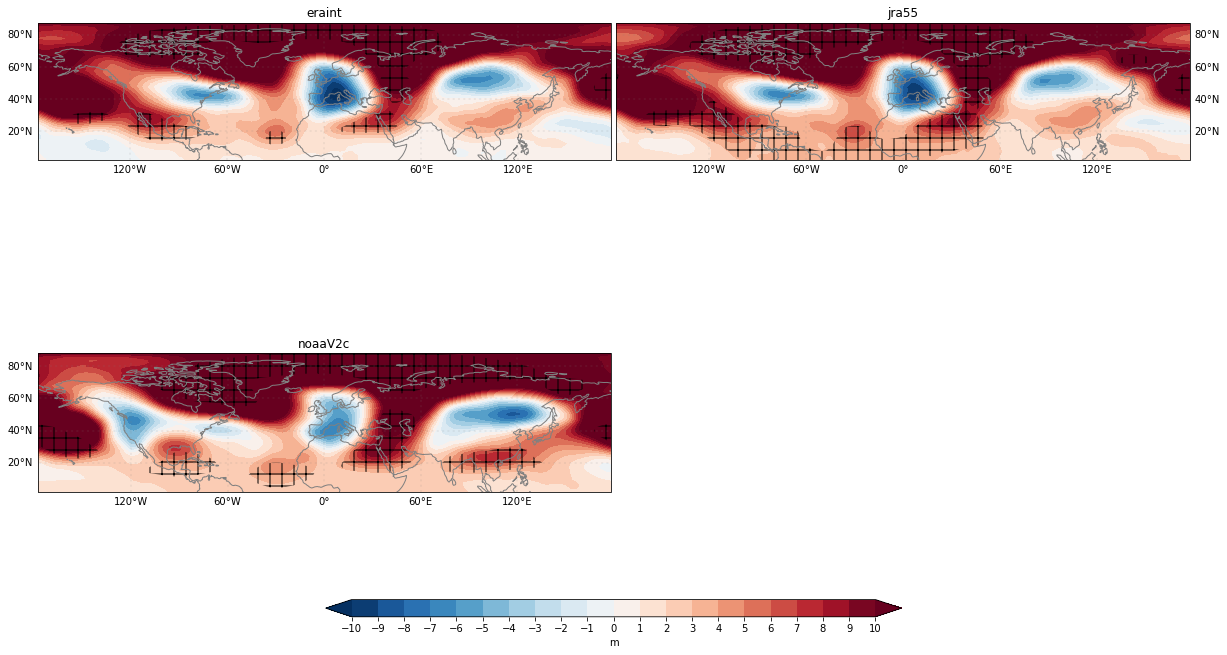

In [26]:
plotList=parList
clevs=np.arange(-10,11,1);levs_ticks=clevs 
cmap='RdBu_r'
nrows=2
ncols=2 

fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,20))
axs=axs.flatten()
for i in np.arange(0,len(plotList),1):
    lons, lats = np.meshgrid(plotList[i][0].coords[plotList[i][0].dims[1]],plotList[i][0].coords[plotList[i][0].dims[0]])
    CS1=axs[i].contourf(lons,lats,10*plotList[i][0][:,:],clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
    levels=[0,0.05,1.0]
    cs = axs[i].contourf(lons,lats,plotList[i][3][:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)

    axs[i].coastlines(color='grey')
    axs[i].set_title(modelList[i])#,x=0.025,y=0.93,backgroundcolor= 'white')
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')
    gl.xlabels_top = False
    if (i% 2) == 0:
        gl.ylabels_right = False
    else:
        gl.ylabels_right = True
        gl.ylabels_left = False

    fig.subplots_adjust(bottom=0.38, top=0.84, left=0.10, right=0.90,wspace=0.010, hspace=0.001)
axs[3].remove()   

cbar_ax = fig.add_axes([0.3, 0.36, 0.4, 0.012])

cbar=fig.colorbar(CS1, cax=cbar_ax,ticks=levs_ticks,orientation='horizontal',label=units)

#plotname='FIG3_GRL_COAFuture'
#plt.savefig(plotsDir+plotname+'.png',format='png',bbox_inches='tight')
plt.show()
